# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

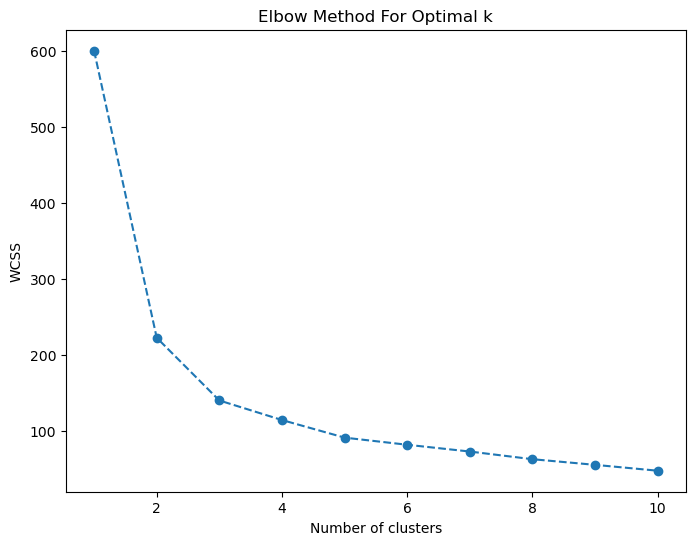

In [3]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


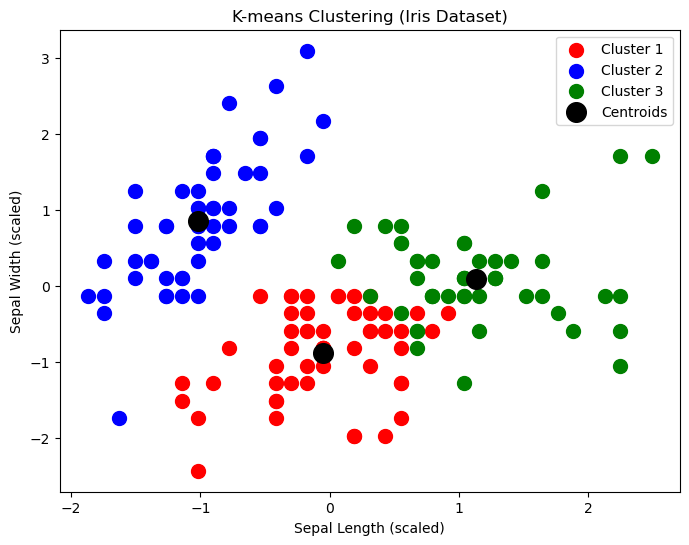

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('K-means Clustering (Iris Dataset)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.show()

In [6]:
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


# Task 2 

In [53]:
df = pd.read_excel("Online Retail.xlsx")

In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [56]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [57]:
import pandas as pd
df.shape

(541909, 8)

In [58]:
df = df.dropna()

In [59]:
df.shape

(406829, 8)

In [60]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
print(df['Country'].head())

0    35
1    35
2    35
3    35
4    35
Name: Country, dtype: int32


In [62]:
columns_to_drop = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate']
df.drop(columns=columns_to_drop, inplace=True)

In [63]:
scaler = StandardScaler()

In [64]:
if df.isnull().sum().sum() > 0:
    df = df.dropna()

data_scaled = scaler.fit_transform(df)

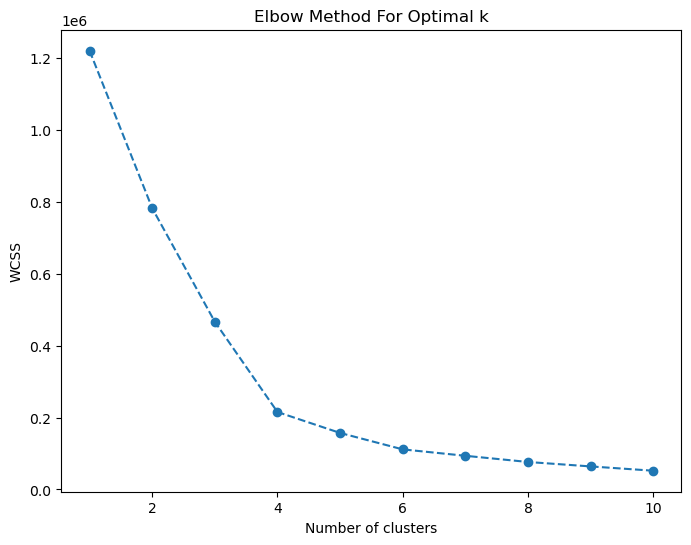

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

In [69]:
from sklearn.decomposition import PCA
df['Cluster'] = y_kmeans

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

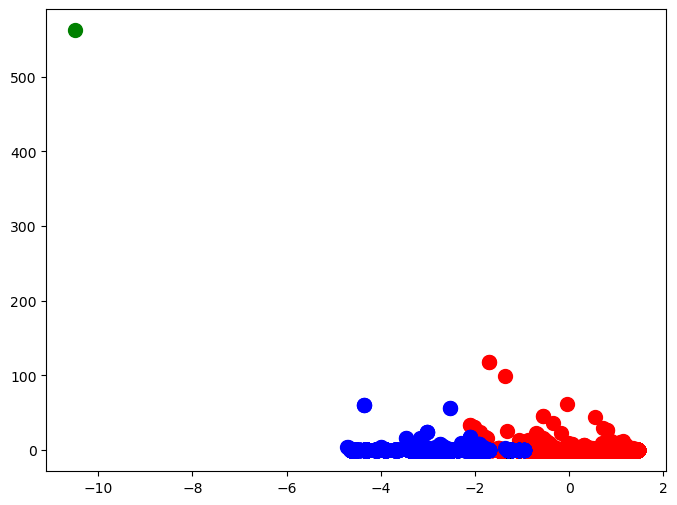

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[df['Cluster'] == 0, 0], data_pca[df['Cluster'] == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[df['Cluster'] == 1, 0], data_pca[df['Cluster'] == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[df['Cluster'] == 2, 0], data_pca[df['Cluster'] == 2, 1], s=100, c='green', label='Cluster 3')

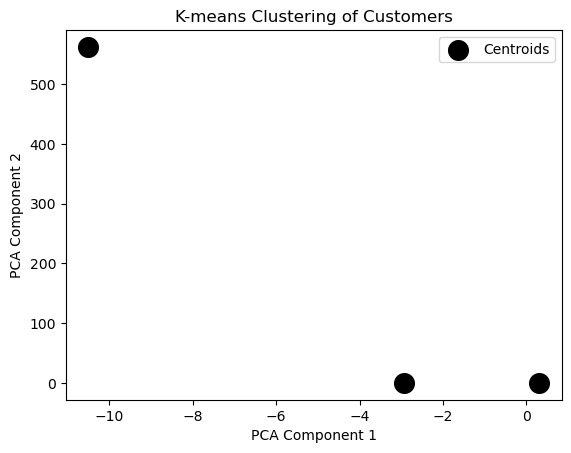

            UnitPrice               Country          
                 mean        std       mean       std
Cluster                                              
0            3.208522  29.707035  34.937314  0.547375
1            4.831051  53.406443  13.019409  5.899751
2        38970.000000        NaN  35.000000       NaN


In [72]:
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=200, c='black', label='Centroids')
plt.title('K-means Clustering of Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

print(df.groupby('Cluster').agg({'UnitPrice': ['mean', 'std'], 'Country': ['mean', 'std']}))

# Task 3

In [74]:
df = pd.read_csv('Finance_data.csv')

In [76]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [77]:
df.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')

In [106]:
from sklearn.preprocessing import LabelEncoder

columns = ['gender', 'Investment_Avenues', 'Gold',
           'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
           'Invest_Monitor', 'Expect', 'Avenue',
           'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
           'Reason_Bonds', 'Reason_FD', 'Source']

label_encoder = LabelEncoder()

for col in columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   gender  age  Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0       0   34                   1             1              2           5   
1       0   23                   1             4              3           2   
2       1   30                   1             3              6           4   
3       1   22                   1             2              1           3   
4       0   24                   0             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...  Duration  Invest_Monitor  \
0                 3               7    6     4  ...         0               1   
1                 1               5    6     7  ...         3               2   
2                 2               5    1     7  ...         1               0   
3                 7               6    4     5  ...         2               0   
4                 6               4    5     7  ...         2               0   

   Expect  Avenue  What are your savin

In [108]:
df.dropna(inplace=True)

C:\Users\mujta\AppData\Local\Temp\ipykernel_2244\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [110]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [111]:
pca = PCA()
pca.fit(data_scaled)
print(pca.explained_variance_ratio_)

[1.84846312e-01 1.23173809e-01 1.03982921e-01 8.18584178e-02
 7.89574818e-02 7.38917287e-02 6.33573875e-02 5.14225237e-02
 4.53272282e-02 3.48327305e-02 3.11465613e-02 2.30633050e-02
 2.19769977e-02 1.78390308e-02 1.62750717e-02 1.45582795e-02
 9.25367056e-03 8.15847393e-03 5.97970766e-03 4.57752749e-03
 2.80003970e-03 1.76838249e-03 9.52411930e-04 1.46281396e-35]


[0.18484631 0.30802012 0.41200304 0.49386146 0.57281894 0.64671067
 0.71006806 0.76149058 0.80681781 0.84165054 0.8727971  0.89586041
 0.9178374  0.93567644 0.95195151 0.96650979 0.97576346 0.98392193
 0.98990164 0.99447917 0.99727921 0.99904759 1.         1.        ]


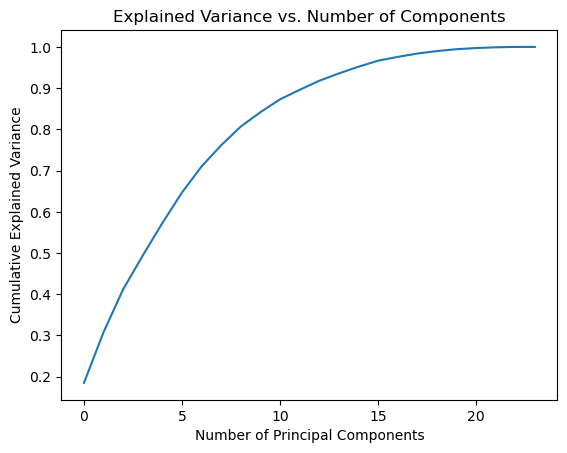

In [112]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [113]:
n_components = 5  
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5
0 -1.102105  1.342677  0.853046  0.721516 -0.856606
1 -5.580359 -0.610953  2.542127  1.395685  3.463879
2  0.231764  3.692506 -0.645119  2.662856  0.726802
3 -3.779650  1.011465 -0.777626  0.207106 -4.122382
4 -5.044174 -1.686592  0.292609  1.892770 -3.871811
